# Import libraries

In [1]:
import pandas as pd
from sklearn.metrics import DistanceMetric
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.manifold import MDS
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from sklearn.preprocessing import StandardScaler
from skbio.stats.composition import clr
import config
import re
import os
from sklearn.manifold import TSNE

# Load and preprocess data

In [2]:
df = pd.read_csv(config.SPECIES, sep="\t")
df = df.T
df

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0007,105,228,39403,925,170947,3011,2,163,4,0,...,0,0,0,0,0,0,0,0,0,0
magic.0008,1,144,23646,537,107325,726,1,62,1,0,...,0,0,0,0,0,0,0,0,0,0
magic.0010,3533,148,26439,2166,19611,28972,0,784,32,0,...,0,0,0,0,0,0,0,0,0,0
magic.0012,58,526,80131,1518,367871,2149,3,175,390,27,...,0,0,0,0,0,0,0,0,0,0
magic.0014,44507,15062,760790,5379,34244,5542,1,662,766,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,7,312,283,7,64,17,3,3,2,10,...,0,0,0,0,0,0,0,0,0,0
magic.6597,6,7,31,9,60,13,0,1,7,1,...,0,0,0,0,0,0,0,0,0,0
magic.6598,6,14,2493,43,219,83,0,12,12,1,...,0,0,0,0,0,0,0,0,0,1
magic.6599,7,8,1280,87,758,339,0,21,3,2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
smoothed = df + 1
relative_abundances = smoothed.div(smoothed.sum(axis=1), axis=0)
relative_abundances

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0007,0.000105,0.000226,0.038933,9.149239e-04,0.168903,0.002976,2.964116e-06,1.620384e-04,0.000005,9.880388e-07,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
magic.0008,0.000002,0.000143,0.023364,5.315649e-04,0.106042,0.000718,1.976078e-06,6.224644e-05,0.000002,9.880388e-07,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
magic.0010,0.003492,0.000147,0.026124,2.141080e-03,0.019377,0.028626,9.880388e-07,7.756105e-04,0.000033,9.880388e-07,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
magic.0012,0.000058,0.000521,0.079174,1.500831e-03,0.363472,0.002124,3.952155e-06,1.738948e-04,0.000386,2.766509e-05,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
magic.0014,0.043976,0.014883,0.751691,5.315649e-03,0.033835,0.005477,1.976078e-06,6.550697e-04,0.000758,1.383254e-05,...,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07,9.880388e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,0.000008,0.000309,0.000281,7.904310e-06,0.000064,0.000018,3.952155e-06,3.952155e-06,0.000003,1.086843e-05,...,9.880388e-07,9.880388e-07,9.8

In [4]:
relative_abundances.sum(axis=1)

magic.0007    1.0
magic.0008    1.0
magic.0010    1.0
magic.0012    1.0
magic.0014    1.0
             ... 
magic.6595    1.0
magic.6597    1.0
magic.6598    1.0
magic.6599    1.0
magic.6600    1.0
Length: 3179, dtype: float64

In [5]:
metadata = pd.read_csv(config.METADATA, sep="\t", index_col=0)
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
Sample_ID,,,,,,,,,,,,,,,,,,,,,
magic.0001,101,no,12/10/16,1430,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0001,Knights_Project_046,magic.0001.S22.001.fa,MagAttract,1544781
magic.0004,101,no,12/15/16,NaN,1,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0004,Knights_Project_046,magic.0004.S34.001.fa,MagAttract,1167038
magic.0006,104,yes,12/15/16,2335,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0006,Knights_Project_076_Pool3,magic.0006.S145.001.fa,PowerSoil,1720636
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388


In [6]:
transformed = pd.DataFrame(clr(relative_abundances), index=relative_abundances.index, columns=relative_abundances.columns)
transformed

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Cellvibrionaceae;g__Agarilytica;s__Agarilytica_rhodophyticola,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Pseudonocardiaceae;g__Pseudonocardia;s__Pseudonocardia_sp001294645,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Amphibacillaceae;g__Virgibacillus;s__Virgibacillus_sp000480335,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0007,4.527748,5.298031,10.445931,6.695183,11.913423,7.874668,0.962921,4.964175,1.473746,-0.135691,...,-0.135691,-0.135691,-0.135691,-0.135691,-0.135691,-0.135691,-0.135691,-0.135691,-0.135691,-0.135691
magic.0008,0.606004,4.889591,9.983848,6.200715,11.496483,6.501783,0.606004,4.055992,0.606004,-0.087143,...,-0.087143,-0.087143,-0.087143,-0.087143,-0.087143,-0.087143,-0.087143,-0.087143,-0.087143,-0.087143
magic.0010,8.071337,4.905097,10.083784,7.582250,9.785048,10.175271,-0.098849,6.566835,3.397658,-0.098849,...,-0.098849,-0.098849,-0.098849,-0.098849,-0.098849,-0.098849,-0.098849,-0.098849,-0.098849,-0.098849
magic.0012,3.914751,6.104414,11.128644,7.163021,12.652704,7.510437,1.223508,5.007698,5.805921,3.169418,...,-0.162786,-0.162786,-0.162786,-0.162786,-0.162786,-0.162786,-0.162786,-0.162786,-0.162786,-0.162786
magic.0014,10.589866,9.506439,13.428556,8.476886,10.327738,8.506733,0.579589,6.383217,6.528929,2.525499,...,-0.113558,-0.113558,-0.113558,-0.113558,-0.113558,-0.113558,-0.113558,-0.113558,-0.113558,-0.113558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,1.646243,5.313005,5.215776,1.646243,3.741189,2.457173,0.953096,0.953096,0.665414,1.964697,...,-0.433198,-0.433198,-0.433198,-0.433198,-0.433198,-0.433198,-0.433198,-0.433198,-0.433198,-0.433198
magic.6597,1.554523,1.688054,3.074348,1.911198,3.719486,2.247670,-0.391388,0.301760,1.688054,0.301760,...,-0.391388,-0.391388,-0.391388,-0.391388,-0.391388,-0.39

In [7]:
metadata = metadata.loc[transformed.index]
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
magic.0010,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0010,Knights_Project_076_Pool3,magic.0010.S167.001.fa,PowerSoil,7251673
magic.0012,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,No antibiotics,Vaginal,0.26,1.0,1.0,magic.0012,Knights_Project_076_Pool3,magic.0012.S177.001.fa,PowerSoil,8106772
magic.0014,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0014,Knights_Project_068_Pool1,magic.0014.S1.001.fa,PowerSoil,15346610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388
magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,soft,...,Other antibiotics,C-section with labor,24.08,NaN,NaN,magic.6599,Knights_Project_077_Pool3,magic.6599.S288.001.fa,PowerSoilPro,1519641


In [8]:
metadata = metadata[~metadata["Timeline_Weeks"].isna() & 
                         (metadata["Timeline_Weeks"] != "na") & 
                         (metadata["abx_day"].apply(lambda x : str(x) in ["Na", "na", "nan"]))]
metadata

,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,expo_cat1,expo_cat2,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044
magic.0010,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,0.07,1.0,0.0,magic.0010,Knights_Project_076_Pool3,magic.0010.S167.001.fa,PowerSoil,7251673
magic.0012,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,No antibiotics,Vaginal,0.26,1.0,1.0,magic.0012,Knights_Project_076_Pool3,magic.0012.S177.001.fa,PowerSoil,8106772
magic.0014,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,No antibiotics,Vaginal,0.23,1.0,0.0,magic.0014,Knights_Project_068_Pool1,magic.0014.S1.001.fa,PowerSoil,15346610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,No antibiotics,Vaginal,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,GBS antibiotics,C-section with labor,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388
magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,soft,...,Other antibiotics,C-section with labor,24.08,NaN,NaN,magic.6599,Knights_Project_077_Pool3,magic.6599.S288.001.fa,PowerSoilPro,1519641


In [9]:
transformed = transformed.loc[metadata.index]
transformed.shape

(2320, 12106)

# Manifold learning

In [10]:
tsne = TSNE(n_jobs=-1, random_state=42)

# from sklearn.preprocessing import StandardScaler

# scaled = StandardScaler().fit_transform(transformed)

emb = tsne.fit_transform(transformed)
emb.shape

(2320, 2)

In [11]:
metadata["t-sne1"] = emb[:, 0]
metadata["t-sne2"] = emb[:, 1]
metadata

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_68224/110609980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["t-sne1"] = emb[:, 0]
/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_68224/110609980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["t-sne2"] = emb[:, 1]


,Patient_No,Hospital,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_anomoly,Abx_timeline.prior..during..after.,abx_day,Consistency,...,calc_age_mo,currentfeed_bf,currentfeed_f,currentfeed_o,Sequencing_Project,Filename,Extraction,depth,t-sne1,t-sne2
magic.0007,105,yes,12/15/16,2115,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0007,Knights_Project_076_Pool3,magic.0007.S155.001.fa,PowerSoil,6825017,-12.581091,-34.100674
magic.0008,105,yes,12/15/16,1525,0,regular,NaN,NaN,NaN,NaN,...,0.03,1.0,1.0,magic.0008,Knights_Project_055,X8.S125.001.fa,PowerSoil,2928044,-12.563688,-34.085663
magic.0010,101,no,12/10/16,2230,0,regular,NaN,NaN,NaN,NaN,...,0.07,1.0,0.0,magic.0010,Knights_Project_076_Pool3,magic.0010.S167.001.fa,PowerSoil,7251673,-31.092838,-16.043997
magic.0012,105,no,12/22/16,950,1,regular,NaN,NaN,NaN,soft,...,0.26,1.0,1.0,magic.0012,Knights_Project_076_Pool3,magic.0012.S177.001.fa,PowerSoil,8106772,-14.615335,-33.208454
magic.0014,106,no,12/22/16,250,1,regular,NaN,NaN,NaN,watery,...,0.23,1.0,0.0,magic.0014,Knights_Project_068_Pool1,magic.0014.S1.001.fa,PowerSoil,15346610,-33.510815,2.066611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.6595,588,NaN,8/22/21,1702,96,regular,NaN,NaN,NaN,NaN,...,24.11,NaN,NaN,magic.6595,Knights_Project_077_Pool3,magic.6595.S253.001.fa,PowerSoilPro,1562968,60.079926,-12.476841
magic.6597,595,NaN,9/6/21,NaN,96,regular,NaN,NaN,NaN,formed,...,24.11,NaN,NaN,magic.6597,Knights_Project_077_Pool3,magic.6597.S265.001.fa,PowerSoilPro,2113880,61.749554,2.516346
magic.6598,585,NaN,8/23/21,725,96,regular,NaN,NaN,NaN,formed,...,24.34,NaN,NaN,magic.6598,Knights_Project_077_Pool3,magic.6598.S277.001.fa,PowerSoilPro,1650388,53.723057,14.944446
magic.6599,573,NaN,7/21/21,845,96,regular,NaN,NaN,NaN,soft,...,24.08,NaN,NaN,magic.6599,Knights_Project_077_Pool3,magic.6599.S288.001.fa,PowerSoilPro,1519641,68.021423,-4.601593


# Plot results

In [16]:
metadata["color_info"] = 0

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_68224/3006604868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["color_info"] = 0


In [ ]:
for i, week in enumerate(metadata["Timeline_Weeks"].unique()):
    metadata["color_info"][metadata["Timeline_Weeks"] == week] = i

In [20]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_68224/3947266101.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 13)


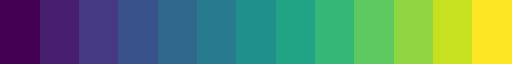

In [21]:
viridis = cm.get_cmap('viridis', 13)
viridis

No antibiotics orange
Antibiotics fuchsia


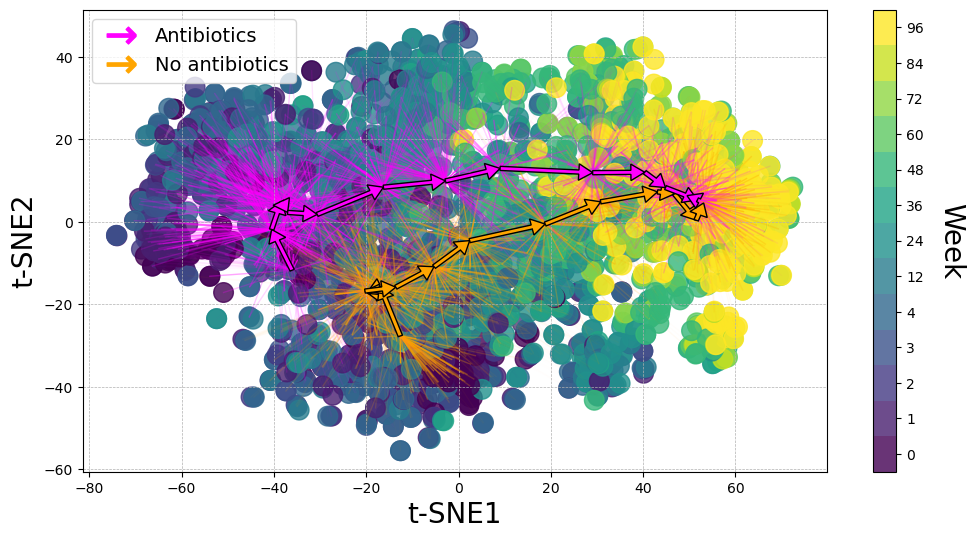

In [24]:
plt.figure(figsize=(12, 6))

arrow_colors = ["orange", "fuchsia"]

ax = plt.gca()
# edgecolors = metadata["expo_cat1"].apply(lambda x : arrow_colors[0] if x == "No antibiotics" else arrow_colors[1])
# alphas = metadata["expo_cat1"].apply(lambda x : 0.8 if x == "No antibiotics" else 0)
sc = ax.scatter(metadata["t-sne1"], metadata["t-sne2"], c=metadata["color_info"], alpha=0.8, s=200, cmap=viridis)


tick_labels = metadata["Timeline_Weeks"].unique().astype(int)
cbar = plt.colorbar(sc, orientation="vertical", ticks=np.arange(-1, tick_labels.shape[0]), 
                    boundaries=np.arange(-1, tick_labels.shape[0]) + 0.5)
tick_labels = [0] + list(tick_labels)
cbar.ax.set_yticklabels(tick_labels)
cbar.set_label('Week', rotation=270, fontsize=20, labelpad=30)


ax.grid(linestyle = '--', linewidth = 0.5)
# ax.legend(prop={'size': 15}, loc=1, handlelength=1.4, handleheight=1.4)

ax.set_xlabel("t-SNE1", fontsize=20)
ax.set_ylabel("t-SNE2", fontsize=20)

for i, abx in enumerate(["No antibiotics", "Antibiotics"]):
    print(abx, arrow_colors[i])

    if abx == "No antibiotics":
        data = metadata[metadata["expo_cat1"] == abx]
    else:
        data = metadata[(metadata["expo_cat1"] == "GBS antibiotics") | (
         metadata["expo_cat1"] == "Other antibiotics")]

    last = None
    for info in metadata["color_info"].unique():
        curr_data = data[data["color_info"] == info]
        x = curr_data["t-sne1"].mean()
        y = curr_data["t-sne2"].mean()
        
        alpha = 1
        
        # compute max_dist
        max_dist = -1
        for row in range(curr_data.shape[0]):
            start_x = x
            end_x = curr_data["t-sne1"][row]
            start_y = y
            end_y = curr_data["t-sne2"][row]
            dist = np.sqrt((start_x - end_x) ** 2 + (start_y - end_y) ** 2)
            max_dist = max(max_dist, dist)
        
        for row in range(curr_data.shape[0]):
            start_x = x
            end_x = curr_data["t-sne1"][row]
#             xs = np.linspace(start_x, end_x, 10)
            
            start_y = y
            end_y = curr_data["t-sne2"][row]
#             ys = np.linspace(start_y, end_y, 10)
#             alphas = np.power(np.linspace(1, 0, 10), 2)

            dist = np.sqrt((start_x - end_x) ** 2 + (start_y - end_y) ** 2)
            alpha = np.power((max_dist - dist) / max_dist, 4)
            alpha = 1 if np.isnan(alpha) else alpha
            
            plt.plot((start_x, end_x), (start_y, end_y), c=arrow_colors[i], linewidth=1, zorder=1, 
                     alpha=alpha)
            
#             for j in range(1, xs.shape[0]):
#                 plt.plot(xs[j - 1 : j + 1], ys[j - 1 : j + 1], #linestyle='dotted', 
#                          alpha=alphas[j], c=arrow_colors[i], linewidth=0.75, zorder=1)
        
        if last is not None:
            plt.arrow(last[0], last[1], x - last[0], y - last[1], width=1, head_width=4, head_length=3, 
                       length_includes_head=True, facecolor=arrow_colors[i], alpha=1, edgecolor="black", zorder=2)
        last = (x, y)
        
        
plt.scatter([], [], c=arrow_colors[1], marker=r'$\rightarrow$',s=20, label='Antibiotics')
plt.scatter([], [], c=arrow_colors[0], marker=r'$\rightarrow$',s=20, label='No antibiotics')

plt.legend(fontsize=14, markerscale=5, loc=2)

plt.savefig(os.path.join(config.FIGURE_DIR, "TSNE.pdf"))
plt.show()

# Permanova

In [26]:
from skbio.stats.distance import permanova
from skbio.stats.distance import DistanceMatrix

info = []

for week in metadata["Timeline_Weeks"].unique():
    print(week)
    data = metadata[metadata["Timeline_Weeks"] == week]
    
    samples = transformed.loc[data.index]
    
    dist = DistanceMetric.get_metric('euclidean')
    dissim = dist.pairwise(samples)
    distance = DistanceMatrix(dissim, tuple(samples.index))
    
    groups = data["expo_cat1"].apply(lambda x : "No antibiotics" if x == "No antibiotics" else "Abx")
    
    res = permanova(distance, groups)
    p = res.values[-2]
    info.append({"p" : p, "week" : week})

0
1
2
3
4
12
24
36
48
60
72
84
96


In [27]:
permanova_results = pd.DataFrame(info).set_index("week")
permanova_results

,p
week,
0,0.001
1,0.001
2,0.001
3,0.001
4,0.001
12,0.001
24,0.001
36,0.001
48,0.003
